In [1]:
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to /private/var/folders/73/dfnlcqg57w7btn76pt1r17cm0000gp/T/pip-install-91vu65kt/twint_4a579167a0f74b48aa61a320612c1616
  Running command git clone -q https://github.com/twintproject/twint.git /private/var/folders/73/dfnlcqg57w7btn76pt1r17cm0000gp/T/pip-install-91vu65kt/twint_4a579167a0f74b48aa61a320612c1616
  Running command git checkout -q origin/master
  Resolved https://github.com/twintproject/twint.git to commit origin/master


In [2]:
import pandas as pd
import twint
import re
import requests
import nest_asyncio
from textblob import TextBlob
nest_asyncio.apply()
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
candidate_name={'Peter Obi':'Obidients',
    'Bola Ahmed Tinubu':'BAT',
    'Atiku Abubakar':'Atiku'}

In [4]:
def twintConfig(search_string):
    c = twint.Config()
    c.Search = search_string[1]
    c.Limit=500
    c.Lang = 'en'
    c.Pandas = True
    c.Pandas_au = True          
    c.Pandas_clean=True
    c.Since='2022-01-01'
    c.Until='2022-12-31'
    twint.run.Search(c)

In [5]:
def Run_Twint(search_vals):
    
    #set empty dataframe for join
    out_df= pd.DataFrame()
    
    for candidate in search_vals.items():
        print ("running for search item: "+candidate[0]+"\n")
        print ("Search string: "+candidate[1]+"\n")
        
        #run twint
        twintConfig(candidate)
        
        #get dataframe
        df_all = twint.storage.panda.Tweets_df
        
        #join Dataframes and create 'Bank' column
        df_all["Candidate"]= candidate[0]
        out_df = pd.concat([out_df,df_all])
        
    return out_df

In [6]:
df_all = Run_Twint(candidate_name)

running for search item: Peter Obi

Search string: Obidients

1608975926729273345 2022-12-31 00:58:48 +0100 <Nairaexchanger> @channelstv What Okowa is not telling them is tthqt his election is not like when they can manually enter figures. This is the first election in Nigeria where actual votes will count. Okowa will not win Delta for PDP. There will be great shock across the land. Obidients keep grinding💪💪💪.
1608975401870848001 2022-12-31 00:56:43 +0100 <akduality> @zarguaruwa @Topboychriss Beware of obidients. They are always hostile but hostility don't win election
1608974899619725314 2022-12-31 00:54:44 +0100 <Dr_chazduke> @JosephOnuorah Oh, My family is fond of the song. Thank you Big Joe for bringing it back. Obidients have come a long way 🙌🏼🫶🏽
1608974476598714376 2022-12-31 00:53:03 +0100 <JosephOnuorah> May 21st Obidient #1MillionMarchForPeterObi Rally  Ikeja 📍 Lagos Nigeria   Some Major Obidients towards the end of the clip 😂  https://t.co/SMMFCONDSf
1608974433674473472 2022-

1608976221358157824 2022-12-31 00:59:59 +0100 <daisy88426179> @KomalSh50098171 @JThakers @NimritAhluwalia @BiggBoss @BeingSalmanKhan @VootSelect @justvoot @OrmaxMedia @thecaspiansk @TellyTalkIndia @PinkvillaTelly @tellychakkar Koi nahi nimrit thra bht sun lo salman ki bat dekh na life me km ayega..tum jese bhi ho mujhe bht pasand ate ho. Pr ha abdu se dur raho nahi to tumhara hi badnam kr raha he heters. Q ki un logo ka koi km nahi he. Sty strng.. #NimritKaurAhluwalia𓃵 . #BBQueenNimrit
1608976179633192960 2022-12-31 00:59:49 +0100 <deangelo73zen> CACTIYE Wall Mount Vertical Baseball Bat Holder YSSY9OV   https://t.co/AJXTbVO954  https://t.co/60ddBfdlU9
1608976178580447232 2022-12-31 00:59:48 +0100 <powlowskihnun> Vulcan Bat Grip, Vulcan 1 75mm Bat Grip, Purple Splatter INN78EO   https://t.co/o5FRlKYK54  https://t.co/IscWVhvC2x
1608976176651067394 2022-12-31 00:59:48 +0100 <schumm54pda> KOOKABURRA Chevron Bat Handle Grip' Full Size (White &amp; Navy Blue Color) CK7IBWL   https://t.co/KXj

In [7]:
pd.set_option('display.max_rows', 10000)

In [8]:
pd.set_option('display.max_columns', 10000)

In [9]:
pd.set_option('display.max_colwidth', None)

In [10]:
df_all.head(1)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Candidate
0,1608975926729273345,1608937693265674241,1.672445e+12,2022-12-31 00:58:48,+0100,,@channelstv What Okowa is not telling them is tthqt his election is not like when they can manually enter figures. This is the first election in Nigeria where actual votes will count. Okowa will not win Delta for PDP. There will be great shock across the land. Obidients keep grinding💪💪💪.,en,[],[],1455050526106738693,1455050526106738693,Nairaexchanger,Nairaexchangerate,6,00,https://twitter.com/Nairaexchanger/status/1608975926729273345,[],[],0,,False,142,1,2,,Obidients,,,,,,,"[{'screen_name': 'channelstv', 'name': 'Channels Television', 'id': '125346858'}]",,,,,Peter Obi


## Making a Copy of the Dataset

In [11]:
#making a copy
df = df_all.copy()

## Data Cleaning

In [12]:
#accessing the twint information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 19
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               80 non-null     object 
 1   conversation_id  80 non-null     object 
 2   created_at       80 non-null     float64
 3   date             80 non-null     object 
 4   timezone         80 non-null     object 
 5   place            80 non-null     object 
 6   tweet            80 non-null     object 
 7   language         80 non-null     object 
 8   hashtags         80 non-null     object 
 9   cashtags         80 non-null     object 
 10  user_id          80 non-null     int64  
 11  user_id_str      80 non-null     object 
 12  username         80 non-null     object 
 13  name             80 non-null     object 
 14  day              80 non-null     int64  
 15  hour             80 non-null     object 
 16  link             80 non-null     object 
 17  urls             8

In [13]:
#the description of the twint 
df.describe()

,created_at,user_id,day,video,nlikes,nreplies,nretweets
count,8.000000e+01,8.000000e+01,80.000000,80.000000,80.000000,80.00000,80.000000
mean,1.672443e+12,8.957490e+17,5.775000,0.175000,11.150000,0.43750,3.100000
std,1.948001e+06,6.904211e+17,0.420217,0.382364,49.388181,1.54136,14.988265
min,1.672440e+12,3.804087e+07,5.000000,0.000000,0.000000,0.00000,0.000000
25%,1.672442e+12,1.726112e+09,6.000000,0.000000,0.000000,0.00000,0.000000
50%,1.672445e+12,1.199265e+18,6.000000,0.000000,0.000000,0.00000,0.000000
75%,1.672445e+12,1.540149e+18,6.000000,0.000000,2.250000,0.00000,0.000000
max,1.672445e+12,1.600812e+18,6.000000,1.000000,413.000000,9.00000,122.000000


In [14]:
df.shape

(80, 39)

In [15]:
#droping rows which languange =! english
df["language"].unique()

array(['en', 'qme', 'hi', 'fr', 'in', 'tl'], dtype=object)

In [16]:
#language that contains only english
df = df[df["language"].isin(['en'])]

In [17]:
df.head(2)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Candidate
0,1608975926729273345,1608937693265674241,1.672445e+12,2022-12-31 00:58:48,+0100,,@channelstv What Okowa is not telling them is tthqt his election is not like when they can manually enter figures. This is the first election in Nigeria where actual votes will count. Okowa will not win Delta for PDP. There will be great shock across the land. Obidients keep grinding💪💪💪.,en,[],[],1455050526106738693,1455050526106738693,Nairaexchanger,Nairaexchangerate,6,00,https://twitter.com/Nairaexchanger/status/1608975926729273345,[],[],0,,False,142,1,2,,Obidients,,,,,,,"[{'screen_name': 'channelstv', 'name': 'Channels Television', 'id': '125346858'}]",,,,,Peter Obi
1,1608975401870848001,1608830005349605377,1.672445e+12,2022-12-31 00:56:43,+0100,,@zarguaruwa @Topboychriss Beware of obidients. They are always hostile but hostility don't win election,en,[],[],415652950,415652950,akduality,IMWakili,6,00,https://twitter.com/akduality/status/1608975401870848001,[],[],0,,False,1,0,0,,Obidients,,,,,,,"[{'screen_name': 'zarguaruwa', 'name': 'Rabson 🇳🇬', 'id': '1602913219'}, {'screen_name': 'Topboychriss', 'name': 'Chris', 'id': '1391841806242000897'}]",,,,,Peter Obi


In [18]:
#the shape of the datset
df.shape

(69, 39)

In [19]:
#dropping unnecessary columns
df = df.drop(['id', 'conversation_id', 'timezone', 'place', 'cashtags', 'language', 'name', 'search', 'hashtags','user_id', 'day', 'hour', 'created_at', 'user_id_str', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet','nreplies', 'nretweets', 'quote_url', 'near', 'geo', 'source',  'username', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],axis = 1)

In [20]:
#checking null values
df.isnull().sum()


date         0
tweet        0
nlikes       0
Candidate    0
dtype: int64

In [21]:
#the get the count of duplicated rows
df_1 = df.duplicated().value_counts()
df_1

False    69
dtype: int64

In [22]:
#using regular expression to remove the signs, links, hastags, non_alphabet etc
def clean_text(text):  
    pat1 = r'@[^ ]+'                   #@signs
    pat2 = r'https?://[A-Za-z0-9./]+'  #links
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'                     # hashtags
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip() 

In [23]:
pat1 = r'@[^ ]+'                   #@signs
pat2 = r'https?://[A-Za-z0-9./]+'  #links
pat3 = r'\'s'                      #floating s's
pat4 = r'\#\w+'                     # hashtags
pat5 = r'&amp '
pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))

In [24]:
combined_pat

"@[^ ]+|https?://[A-Za-z0-9./]+|\\'s|\\#\\w+|&amp |[^A-Za-z\\s]"

In [25]:
#applying the regular expression cleaning
df['tweet'] = df['tweet'].apply(clean_text)

In [26]:
#keeping it in a new dataframe
df_result = df.drop_duplicates()

In [27]:
df_result1 = df_result.copy()

In [28]:
#keeping it in a dataframe
df_result1.head(2)

,date,tweet,nlikes,Candidate
0,2022-12-31 00:58:48,what okowa is not telling them is tthqt his election is not like when they can manually enter figures this is the first election in nigeria where actual votes will count okowa will not win delta for pdp there will be great shock across the land obidients keep grinding,142,Peter Obi
1,2022-12-31 00:56:43,beware of obidients they are always hostile but hostility dont win election,1,Peter Obi


In [29]:
print("Running sentiment process")
# creating two new columns(polarity and subjectivity)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#applying the subjectivity and polarity function
df_result1["Subjectivity"] = df_result1['tweet'].apply(getSubjectivity)
df_result1["Polarity"] = df_result1['tweet'].apply(getPolarity)

Running sentiment process


In [30]:
#seeig a sample of the result
df_result1.sample()

,date,tweet,nlikes,Candidate,Subjectivity,Polarity
18,2022-12-31 00:55:10,supporting atiku and rambling on politeness and decency,2,Atiku Abubakar,0.25,0.25


In [31]:
#function to determine the positive, negative and neutral sentiments
def getAnalysis(text):
    if text < 0:
        return 'negative'
    elif text == 0:
        return 'neutral'
    else:
        return 'positive'
           

In [32]:
df_result1['Analysis'] = df_result1['Polarity'].apply(getAnalysis)

In [33]:
df_result1.head(4)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
0,2022-12-31 00:58:48,what okowa is not telling them is tthqt his election is not like when they can manually enter figures this is the first election in nigeria where actual votes will count okowa will not win delta for pdp there will be great shock across the land obidients keep grinding,142,Peter Obi,0.395833,0.162500,positive
1,2022-12-31 00:56:43,beware of obidients they are always hostile but hostility dont win election,1,Peter Obi,0.400000,0.800000,positive
2,2022-12-31 00:54:44,oh my family is fond of the song thank you big joe for bringing it back obidients have come a long way,4,Peter Obi,0.166667,-0.016667,negative
3,2022-12-31 00:53:03,may st obidient rally ikeja lagos nigeria some major obidients towards the end of the clip,44,Peter Obi,0.500000,0.062500,positive


In [34]:
#locating all Peter_obi's sentiment
Peter_Obi = df_result1.loc[df_result1['Candidate'] == 'Peter Obi']
Peter_Obi.head(5)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
0,2022-12-31 00:58:48,what okowa is not telling them is tthqt his election is not like when they can manually enter figures this is the first election in nigeria where actual votes will count okowa will not win delta for pdp there will be great shock across the land obidients keep grinding,142,Peter Obi,0.395833,0.162500,positive
1,2022-12-31 00:56:43,beware of obidients they are always hostile but hostility dont win election,1,Peter Obi,0.400000,0.800000,positive
2,2022-12-31 00:54:44,oh my family is fond of the song thank you big joe for bringing it back obidients have come a long way,4,Peter Obi,0.166667,-0.016667,negative
3,2022-12-31 00:53:03,may st obidient rally ikeja lagos nigeria some major obidients towards the end of the clip,44,Peter Obi,0.500000,0.062500,positive
4,2022-12-31 00:52:52,this is the excitement of a possible new nigeria i love this,0,Peter Obi,0.684848,0.212121,positive


In [35]:
#Peter Obi Analysis Count
AnalysisCount_PeterObi= Peter_Obi['Analysis'].groupby(Peter_Obi['Analysis']).size().reset_index(name='counts')
AnalysisCount_PeterObi

,Analysis,counts
0,negative,10
1,neutral,5
2,positive,22


In [36]:
#locating all BAT's sentiment
BAT = df_result1.loc[df_result1['Candidate'] == 'Bola Ahmed Tinubu']
BAT.head(5)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
1,2022-12-31 00:59:49,cactiye wall mount vertical baseball bat holder yssyov,0,Bola Ahmed Tinubu,0.000000,0.000000,neutral
2,2022-12-31 00:59:48,vulcan bat grip vulcan mm bat grip purple splatter inneo,0,Bola Ahmed Tinubu,0.000000,0.000000,neutral
3,2022-12-31 00:59:48,kookaburra chevron bat handle grip full size white amp navy blue color ckibwl,0,Bola Ahmed Tinubu,0.216667,0.116667,positive
5,2022-12-31 00:59:44,nerf bat does the trick with no damages,2,Bola Ahmed Tinubu,0.000000,0.000000,neutral
11,2022-12-31 00:59:32,love combining flat bat and small ball jugs machine with instant go challenges hand eye bat path and the feel of no slack instant acceleration too much slack the hitter will spin the shoulders and slice with the flat bat or swingmiss with skinny part,14,Bola Ahmed Tinubu,0.397619,0.057143,positive


In [37]:
#BAT Analysis Count
AnalysisCount_BAT= BAT['Analysis'].groupby(BAT['Analysis']).size().reset_index(name='counts')
AnalysisCount_BAT

,Analysis,counts
0,negative,2
1,neutral,7
2,positive,3


In [38]:
#locating all Atiku's sentiment
Atiku_Abubakar = df_result1.loc[df_result1['Candidate'] == 'Atiku Abubakar']
Atiku_Abubakar.head(5)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
0,2022-12-31 00:59:13,but the mob without head are saying atiku asked obasanjo to remove anenih name from pcc list in,1,Atiku Abubakar,0.000000,0.000000,neutral
1,2022-12-31 00:58:54,even among thieves there is such a thing as honour why wouldnt atiku tow the path of honour by either stepping down or asking ayu to step down abi the man no get integrity,6,Atiku Abubakar,0.359259,-0.103704,negative
2,2022-12-31 00:58:52,i wonder how obi distraction is now ur business u better drink water and mind your losing pdp of a presidential part ur dubai president name atiku,0,Atiku Abubakar,0.500000,0.500000,positive
3,2022-12-31 00:58:31,no bi small tin wike has literally opened an old wound in obj that why obj will never forgive atiku i bet you if the presidential contest were between atiku and tinubu who obj also hates he obj could endorse tinubu if he unable to stay out of the fray hahaha,3,Atiku Abubakar,0.375000,-0.112500,negative
4,2022-12-31 00:58:19,is the most decisive politician in nigeria he always play god in any election season since he was a vice president he will never smell that seat maybe next life go and mark today date i will remind you on th of february after election,8,Atiku Abubakar,0.250000,0.250000,positive


In [39]:
#Atiku Analysis Count
AnalysisCount_AtikuAbubakar= Atiku_Abubakar['Analysis'].groupby(Atiku_Abubakar['Analysis']).size().reset_index(name='counts')
AnalysisCount_AtikuAbubakar

,Analysis,counts
0,negative,5
1,neutral,4
2,positive,11


In [40]:
#grouping all candidates
the_candidates = df_result1.loc[df_result1['Analysis'] == 'positive']
the_candidates.head(5)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
0,2022-12-31 00:58:48,what okowa is not telling them is tthqt his election is not like when they can manually enter figures this is the first election in nigeria where actual votes will count okowa will not win delta for pdp there will be great shock across the land obidients keep grinding,142,Peter Obi,0.395833,0.162500,positive
1,2022-12-31 00:56:43,beware of obidients they are always hostile but hostility dont win election,1,Peter Obi,0.400000,0.800000,positive
3,2022-12-31 00:53:03,may st obidient rally ikeja lagos nigeria some major obidients towards the end of the clip,44,Peter Obi,0.500000,0.062500,positive
4,2022-12-31 00:52:52,this is the excitement of a possible new nigeria i love this,0,Peter Obi,0.684848,0.212121,positive
5,2022-12-31 00:52:52,i love the obidients people because they dont have the capacity to defeat us they are learners political threatrics in nigeria,0,Peter Obi,0.350000,0.250000,positive


In [41]:
#positive sentiments counts for all candidates
all_candidates = the_candidates['Candidate'].groupby(the_candidates['Candidate']).size().reset_index(name='counts')
all_candidates

,Candidate,counts
0,Atiku Abubakar,11
1,Bola Ahmed Tinubu,3
2,Peter Obi,22


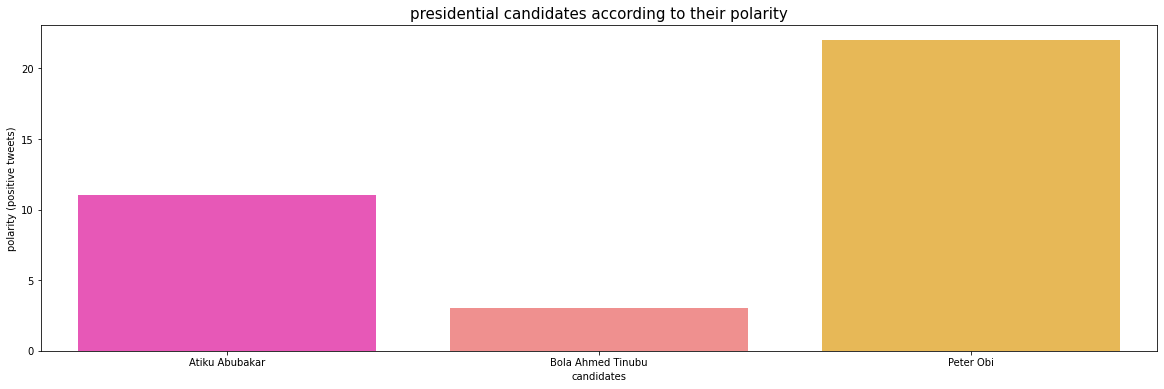

In [42]:
#plotting the results
plt.figure(figsize=(20,6))
sns.barplot(data = all_candidates, x= 'Candidate', y ='counts', palette = 'spring')

#setting the properties for the chart
plt.title('presidential candidates according to their polarity', fontsize = 15 ) 
plt.xlabel('candidates')
plt.ylabel('polarity (positive tweets)')

#saving the chart
plt.show()

In [43]:
#saving the dataframe to csv
df_result1.to_csv('sentiment.csv')